<a href="https://colab.research.google.com/github/Zahidd02/Machine_Learning/blob/master/TensorFlow/Cats_vs_Dogs_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://learn.udacity.com/courses/ud187/lessons/4a041ac9-3bb9-43d6-8a02-4fa912626028/concepts/610653f2-f9a7-43fa-a8c8-d166eea9c4ce
from __future__ import absolute_import, division

import os
import matplotlib.pyplot as plt
import numpy as np
import math 

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', 
                                  origin=url, extract=True)

68606236/68606236 [==============================] - 4s 0us/step


In next step we are:
*   Listing all files in the directory using '!ls' command
*   Storing train and validation(test) directory paths



In [4]:
# !ls /root/.keras/datasets/cats_and_dogs_filtered  
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')

*   Dividing testing and training sets to distinct categories.





In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

1. BATCH_SIZE:
  * Number of training examples to process before updating model variables.
2. IMG_SHAPE:
  * The training data consists of images with both height and width of 150 pixels. 







In [6]:
BATCH_SIZE = 100
IMG_SHAPE = 150

The ImageDataGenerator class does following operations:
1. Read images from the disk.
2. Decode contents of these images and convert it into proper grid format as per their RGB content.
3. Convert them into floating point tensors.
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.





In [7]:
train_img_generator = ImageDataGenerator(rescale = 1/255,
                                         rotation_range = 40,
                                         width_shift_range = 0.2,
                                         height_shift_range = 0.2,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True,
                                         fill_mode = 'nearest')
test_img_generator = ImageDataGenerator(rescale=1/255)

In [8]:
train_data = train_img_generator.flow_from_directory(batch_size=BATCH_SIZE,
             directory=train_dir, shuffle=True, target_size=(IMG_SHAPE, IMG_SHAPE),
             class_mode='binary')
test_data = train_img_generator.flow_from_directory(batch_size=BATCH_SIZE,
             directory=test_dir, shuffle=False, target_size=(IMG_SHAPE, IMG_SHAPE),
             class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


1.0


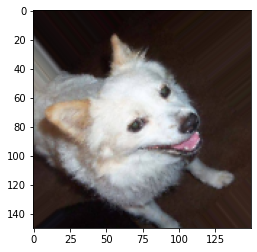

In [9]:
sample_img, sample_label = train_data[1]
print(sample_label[5]) # Cat => 0.0, Dog => 1.0
plt.imshow(sample_img[5])

1. Another popular approach when working with binary classification problems, is to use a classifier that consists of a Dense layer with 1 output unit and a 'sigmoid' activation function. Either of 'softmax' or 'sigmoid' activation functions will work well in a binary classification problem. However, if we decide to use a sigmoid activation function in the classifier, we'll also have to change the loss parameter in the model.compile() method, from 'sparse_categorical_crossentropy' to 'binary_crossentropy'.

2. Here we use 'Dropout(0.5)' which prevents overfitting, with the probability of 0.5. The '0.5' suggests that 50% of the incoming values into the Dropout layer will be set to zero.

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [14]:
EPOCHS = 100
predictor = model.fit_generator(
    train_data,
    steps_per_epoch = int(math.ceil(2000/float(BATCH_SIZE))),
    epochs = EPOCHS,
    validation_data = test_data,
    validation_steps = int(math.ceil(1000/float(BATCH_SIZE)))
)

<ipython-input-14-9cc0193edccf>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  predictor = model.fit_generator(


Epoch 1/100
20/20 [==============================] - 31s 1s/step - loss: 0.7183 - accuracy: 0.4955 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 22s 1s/step - loss: 0.6912 - accuracy: 0.5115 - val_loss: 0.6806 - val_accuracy: 0.5220
Epoch 3/100
20/20 [==============================] - 21s 1s/step - loss: 0.6825 - accuracy: 0.5630 - val_loss: 0.6538 - val_accuracy: 0.6110
Epoch 4/100
20/20 [==============================] - 21s 1s/step - loss: 0.6779 - accuracy: 0.5750 - val_loss: 0.6596 - val_accuracy: 0.6180
Epoch 5/100
20/20 [==============================] - 21s 1s/step - loss: 0.6641 - accuracy: 0.5755 - val_loss: 0.6416 - val_accuracy: 0.6160
Epoch 6/100
20/20 [==============================] - 21s 1s/step - loss: 0.6452 - accuracy: 0.6260 - val_loss: 0.6230 - val_accuracy: 0.6600
Epoch 7/100
20/20 [==============================] - 22s 1s/step - loss: 0.6286 - accuracy: 0.6325 - val_loss: 0.6229 - val_accuracy: 0.6600
Epoch 8/100
2

* Without using the overfitting prevention techniques (i.e. Dropout and Image Augmentation techniques), the test accuracy of about 75% is obtained.
* With using overfitting prevention techniques the accuracy goes up to 81%.
* At EPOCHS=100, the graph suggests that the EPOCHS value should be limited to 40 above which the training and testing graphs diverge, suggesting the model is now trying to memorize the pattern instead of learning it.


Text(0.5, 1.0, 'Training and Validation Loss')

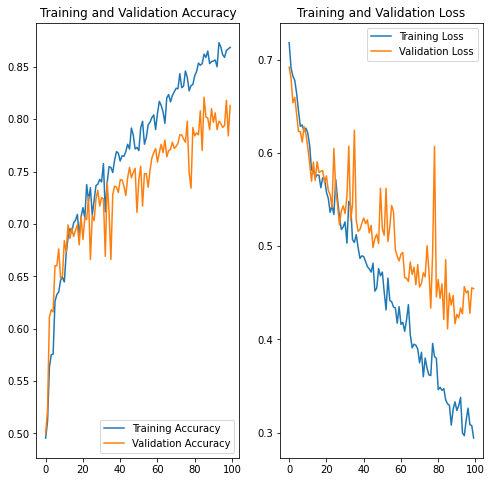

In [15]:
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
accuracy = predictor.history['accuracy']
val_accuracy = predictor.history['val_accuracy']

loss = predictor.history['loss']
val_loss = predictor.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')